<a href="https://colab.research.google.com/github/mohammadhossein-kr/AI-vs.-AI/blob/main/AI%20vs.%20AI%20-%20Covid-19%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Packages
import pandas as pd
import numpy as np

In [2]:
#Load dataset
dataset_url ="https://raw.githubusercontent.com/mohammadhossein-kr/AI-vs.-AI/main/Iran%20Covid-19%20Reports/Covid19%20-%20Iran%20Reports3.csv?token=GHSAT0AAAAAABSBTKP7DAJS5DNY7EHHC6X6YQ6GWYA"
dataset = pd.read_csv(dataset_url)
dataset.describe()

,new_cases,positive_test_rate,total_vaccinations,people_fully_vaccinated,new_deaths
count,740.000000,740.000000,7.400000e+02,7.400000e+02,740.000000
mean,9514.144595,0.151771,2.462999e+07,9.746021e+06,184.636486
std,9430.067653,0.093837,4.388122e+07,1.831857e+07,143.262230
min,2.000000,0.014300,0.000000e+00,0.000000e+00,0.000000
25%,2454.500000,0.093900,0.000000e+00,0.000000e+00,82.000000
50%,6602.500000,0.122700,1.241930e+05,1.124420e+05,140.000000
75%,12428.000000,0.182900,2.313770e+07,6.150817e+06,229.000000
max,50228.000000,0.537500,1.411504e+08,5.541802e+07,709.000000


In [ ]:
#Pandas dataframe to numpy array
data = dataset.values
print(data.shape)

(740, 5)


In [ ]:
#Normalization
def Normalize(data):
  norm = data.copy()
  for col in range(data.shape[1]):
    norm[:,col] = (np.max(norm[:,col])- norm[:,col])/(np.max(norm[:,col])-np.min(norm[:,col]))
  return norm
data_norm = Normalize(data)
print(data_norm)

[[1.00000000e+00 6.77752294e-01 1.00000000e+00 1.00000000e+00
  9.97179126e-01]
 [9.99980090e-01 6.77752294e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [9.99780990e-01 6.77752294e-01 1.00000000e+00 1.00000000e+00
  9.97179126e-01]
 ...
 [7.61677219e-01 6.42392966e-01 2.21713133e-03 1.69266242e-03
  6.98166432e-01]
 [8.59893282e-01 6.56154434e-01 1.02310718e-03 4.99097586e-04
  6.84062059e-01]
 [8.10416916e-01 6.84250765e-01 0.00000000e+00 0.00000000e+00
  6.60084626e-01]]


In [ ]:
#Seperate Input and Output
from sklearn.model_selection import train_test_split
X = data_norm[:,0:-1]
y = data_norm[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 31)
print(X_train.shape , y_train.shape)


(592, 4) (592,)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 60)                300       
                                                                 
 dense_6 (Dense)             (None, 100)               6100      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 60)                6060      
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 22,621
Trainable params: 22,621
Non-trainable

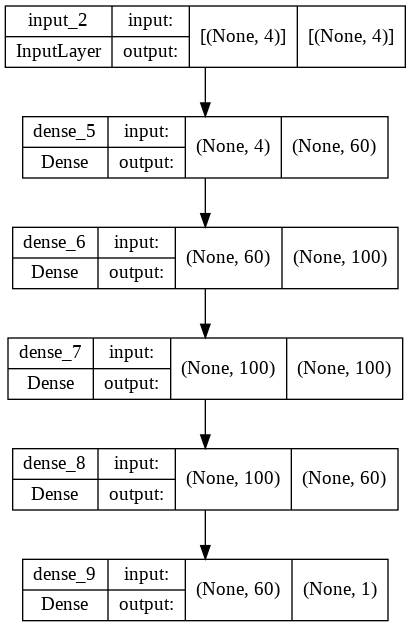

In [ ]:
#Model implemnation
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D, Dense
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2DTranspose
input_layer = Input(shape=(4,))
l1 = Dense(units=60,activation = "relu")(input_layer)
l2 = Dense(units=100,activation = "relu")(l1)
l3 = Dense(units=100,activation = "relu")(l2)
l4 = Dense(units=60,activation ="relu")(l3)
output = Dense(units=1,activation = "sigmoid")(l4)
model = Model(input_layer,output)
model.summary()
plot_model(model,show_shapes=True)

In [ ]:
#Compile Model
model.compile(optimizer=Adam(),loss="MSE")

model.fit(x=X_train,y=y_train,epochs=400,steps_per_epoch=10,validation_data=[X_test,y_test],validation_steps=10)

Epoch 1/400
10/10 [==============================] - 2s 58ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 2/400
10/10 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 3/400
10/10 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 4/400
10/10 [==============================] - 0s 20ms/step - loss: 9.5344e-04 - val_loss: 0.0046
Epoch 5/400
10/10 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 6/400
10/10 [==============================] - 0s 19ms/step - loss: 9.9498e-04 - val_loss: 0.0053
Epoch 7/400
10/10 [==============================] - 0s 20ms/step - loss: 9.2879e-04 - val_loss: 0.0051
Epoch 8/400
10/10 [==============================] - 0s 15ms/step - loss: 9.4918e-04 - val_loss: 0.0054
Epoch 9/400
10/10 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 10/400
10/10 [==============================] - 0s 20ms/step - loss: 9.5454e-0

In [ ]:
#Test the model
pred = model.predict(X_test)
print("input:",X_test[0,0],X_test[0,1],"Output:",y_test[0], "pred:",pred[0])

input: 0.8486640385457731 0.6196483180428134 Output: 0.6995768688293371 pred: [0.7098673]


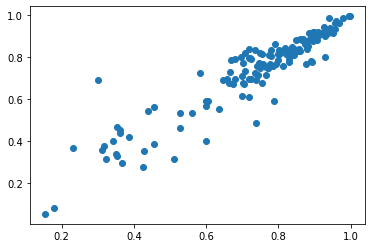

In [ ]:
#Visulize the results
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=pred)
plt.show()

In [ ]:
pred = model.predict(X_test)
print("accuracy is:",np.mean(np.argmax(pred[1])==np.argmax(y_test[1])))
print("accuracy is:",(pred[1]/y_test[1])*100)

accuracy is: 1.0
accuracy is: [96.76569]
